# Yahoo! News Scraper
Scrape news from Yahoo! based on a specific search criteria

In [ ]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

def get_the_news(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)
        
    return articles

In [ ]:
# run the main program
articles = get_the_news('iphone')

In [ ]:
# show the first 4 records
articles[0:4]

[("Apple's iPhone 12 announcement may be coming soon, introducing big changes like a new design, 5G,...",
  'Business Insider via Yahoo News',
  '2 days ago',
  '2020-09-05',
  "Apple's new iPhones are expected to launch a few weeks later than usual this year because of the...",
  'https://r.search.yahoo.com/_ylt=AwrC1CnFLVRf0l0AOyDQtDMD;_ylu=X3oDMTByOHZyb21tBGNvbG8DYmYxBHBvcwMxBHZ0aWQDBHNlYwNzcg--/RV=2/RE=1599381061/RO=10/RU=https%3a%2f%2fnews.yahoo.com%2fnext-years-iphone-12-starting-143900059.html/RK=2/RS=p79ct1_M2lOlPrb0AwdZBW5s7To-'),
 ('The best Apple iPhone deals for September 2020',
  'Digital Trends via Yahoo Finance',
  '27 minutes ago',
  '2020-09-05',
  'More than 10 years after ushering in the smartphone era, the Apple iPhone is still the single most famous device on the market — even if Android makers...',
  'https://r.search.yahoo.com/_ylt=AwrC1CnFLVRf0l0APSDQtDMD;_ylu=X3oDMTBybGY3bmpvBGNvbG8DYmYxBHBvcwMyBHZ0aWQDBHNlYwNzcg--/RV=2/RE=1599381061/RO=10/RU=https%3a%2f%2ffina

In [2]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

In [16]:
url = 'https://news.search.yahoo.com/search;_ylt=AwrXnCGXtn1gymIA5qHQtDMD;_ylc=X1MDNTM3MjAyNzIEX3IDMgRmcgMEZnIyA3NiLXRvcARncHJpZAM3X1NwRGo1blJhV1pGbGdpNzJiSUpBBG5fcnNsdAMwBG5fc3VnZwMxMARvcmlnaW4DbmV3cy5zZWFyY2gueWFob28uY29tBHBvcwMwBHBxc3RyAwRwcXN0cmwDMARxc3RybAM0BHF1ZXJ5A25ld3MEdF9zdG1wAzE2MTg4NTE0OTQ-?p=news&fr2=sb-top'
    #url = template.format(search)

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
cards = soup.find_all('div', 'NewsArticle')
headline = cards[1].find('h4', 's-title').text
source = cards[2].find("span", 's-source').text
posted = cards[3].find('span', 's-time').text.replace('·', '').strip()
description = cards[4].find('p', 's-desc').text.strip()
raw_link = cards[5].find('a').get('href')
unquoted_link = requests.utils.unquote(raw_link)
pattern = re.compile(r'RU=(.+)\/RK')
clean_link = re.search(pattern, unquoted_link).group(1)
articles = []
links = set()
#def get_article(card):
  #  """Extract article information from the raw html"""
article = (headline, source, posted, description, clean_link)
articles.append(article)

doctype html
<html class="NoJs" id="atomic" lang="en-US"><head><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_76.min.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_114.min.png" rel="apple-touch-icon" sizes="114x114"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_120.min.png" rel="apple-touch-icon" sizes="120x120"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"><noscript><meta content="0;url=https://news.search.yahoo.com/search?p=news&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/></noscript><script nonce="jeCQwHJV+vhW+A+QG2eF6g==" type="text/javascript">(function(){var j=window,s=document,u,o;var c=false;var r=false;var p=2,m="\x03",l="\x04",n="ABCDEFGHIJKLMNOPQR
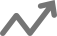
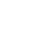
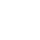
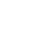
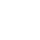

In [28]:
for i in soup:
  print(i)

In [ ]:

#def get_the_news(search):
    """Run the main program"""
    #website
    template = 'https://news.search.yahoo.com/search?p={}'
    #url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)
        
    return articles

In [21]:
with open('results.csv', 'w', newline='', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
  writer.writerows(articles)

  #return articles

In [ ]:
for card in cards:
article = get_article(card)
  link = article[-1]
    if not link in links:
      links.add(link)
      articles.append(article)
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break

headline = card.find('h4', 's-title').text
source = card.find("span", 's-source').text
posted = card.find('span', 's-time').text.replace('·', '').strip()
description = card.find('p', 's-desc').text.strip()
raw_link = card.find('a').get('href')
unquoted_link = requests.utils.unquote(raw_link)
pattern = re.compile(r'RU=(.+)\/RK')
clean_link = re.search(pattern, unquoted_link).group(1)
    
   #for ROWS Names
article = (headline, source, posted, description, clean_link)
return article

In [24]:
import pandas as pd
data = pd.read_csv('/content/results.csv')

In [25]:
data


Headline  ...                                               Link
0  News From the Front on Semiconductors: The Sho...  ...  https://www.kxnet.com/news/local-news/morning-...

[1 rows x 5 columns]